## A study of common implementation of min-min  pareto front calculators

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
# Very slow for many datapoints.  Fastest for many costs, most readable
def is_pareto_efficient_dumb(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient


# Fairly fast for many datapoints, less fast for many costs, somewhat readable
def is_pareto_efficient_simple(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient]<c, axis=1)  # Keep any point with a lower cost
            is_efficient[i] = True  # And keep self
    return is_efficient


# Faster than is_pareto_efficient_simple, but less readable.
def is_pareto_efficient(costs, return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return is_efficient_mask
    else:
        return is_efficient

inputPoints = [[1,1], 
               [0.5,1.75], 
               [1,2], 
               [3,2], 
               [4,1]]

print(is_pareto_efficient_dumb(np.array(inputPoints)))
print(is_pareto_efficient_simple(np.array(inputPoints)))
print(is_pareto_efficient(np.array(inputPoints)))

[ True  True False False False]
[ True  True False False False]
[ True  True False False False]


### Parento front example - objectives matrix dimensions: 300 X 2 
(300 data points, 2 dimensions)

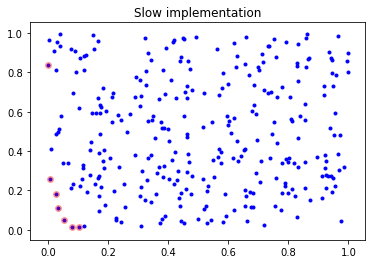

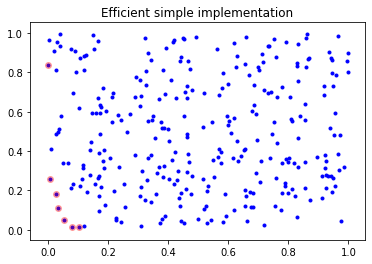

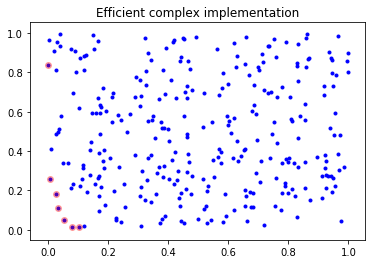

In [170]:
rng = np.random.RandomState(1134).rand(300, 2)
plt.scatter(x=rng[:,0],y=rng[:,1],c='b',marker='.')
a = is_pareto_efficient_dumb(np.array(rng))
plt.scatter(x=np.where(a,rng[:,0],np.nan),y=np.where(a,rng[:,1],np.nan),c='r',alpha=0.3,marker='o')
plt.title('Slow implementation')
plt.show()

a = is_pareto_efficient_simple(np.array(rng))
plt.scatter(x=rng[:,0],y=rng[:,1],c='b',marker='.')
plt.scatter(x=np.where(a,rng[:,0],np.nan),y=np.where(a,rng[:,1],np.nan),c='r',alpha=0.3,marker='o')
plt.title('Efficient simple implementation')
plt.show()

a = is_pareto_efficient(np.array(rng))
plt.scatter(x=rng[:,0],y=rng[:,1],c='b',marker='.')
plt.scatter(x=np.where(a,rng[:,0],np.nan),y=np.where(a,rng[:,1],np.nan),c='r',alpha=0.3,marker='o')
plt.title('Efficient complex implementation')
plt.show()

### Utility function: Runtime analyzer
* Simple method that returns average time taken to run a pareto front calculator

In [153]:
def runtime_anal(tot_val, rand_state, func, dim = 2):
    rng = np.random.RandomState(rand_state).rand(tot_val, dim)
    times = %timeit -r3 -n5 -o a = func(np.array(rng))
    return times.average

## Time comparisons of three front calculator algorithms 
* First plot: varying with datapoints N while keeping dimensions M constant at 2
* Second plot: varying dimensions M while keeping datapoints N constant

<b> It should be noted that the worst case scenario is that data consists of an all non-dominant set which leads to O(N^2) time complexity for all three algorithms </b>

2.52 ms ± 223 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
20.1 ms ± 4.4 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
40.6 ms ± 3.18 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
125 ms ± 18.5 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
271 ms ± 9.51 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
467 ms ± 13.2 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
695 ms ± 14.7 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
1.7 s ± 36 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
3.44 s ± 221 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


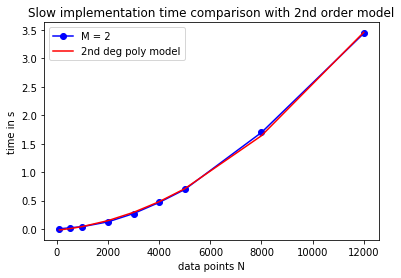

255 ms ± 9.62 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
282 ms ± 6.16 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
322 ms ± 37.1 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
330 ms ± 14 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
381 ms ± 17.9 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
398 ms ± 12.1 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
455 ms ± 13.9 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
586 ms ± 35.6 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
597 ms ± 51.9 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


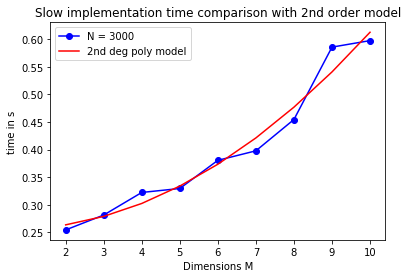

In [341]:
rand_state = 1234

avg_time = []
tot_vals = []

dim = 2

for tot_val in [100, 500, 1000, 2000, 3000, 4000, 5000, 8000, 12000]:
    avg_time.append(runtime_anal(tot_val, rand_state, is_pareto_efficient_dumb, dim))
    tot_vals.append(tot_val)

plt.plot(tot_vals,avg_time,'o-b',label='M = 2')
pfit = np.polyfit(tot_vals,avg_time, 2)
tot_vals = np.array(tot_vals)
plt.plot(tot_vals,pfit[0]*tot_vals**2 + pfit[1]*tot_vals + pfit[2],'-r',label='2nd deg poly model')   
plt.title('Slow implementation time comparison with 2nd order model')
plt.xlabel('data points N')
plt.ylabel('time in s')
plt.legend()
plt.show()

avg_time = []
tot_vals = []
vals = 3000

for tot_val in [2,3,4,5,6,7,8,9,10]:
    avg_time.append(runtime_anal(vals, rand_state, is_pareto_efficient_dumb, tot_val))
    tot_vals.append(tot_val)

plt.plot(tot_vals,avg_time,'o-b',label='N = 3000')
pfit = np.polyfit(tot_vals,avg_time, 2)
tot_vals = np.array(tot_vals)
plt.plot(tot_vals,pfit[0]*tot_vals**2 + pfit[1]*tot_vals + pfit[2],'-r',label='2nd deg poly model')   
plt.title('Slow implementation time comparison with 2nd order model')
plt.xlabel('Dimensions M')
plt.ylabel('time in s')
plt.legend()
plt.show()
    

18.2 ms ± 2.04 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
67.3 ms ± 6.76 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
152 ms ± 7.99 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
344 ms ± 17.4 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
478 ms ± 9.69 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
663 ms ± 48.2 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
749 ms ± 6.5 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
900 ms ± 8.96 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
1.23 s ± 19.4 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
1.59 s ± 110 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
3.52 s ± 41.9 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


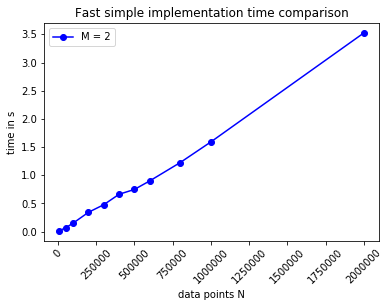

82.9 ms ± 6.49 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
199 ms ± 5.02 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
661 ms ± 68.3 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
1.8 s ± 102 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
4.35 s ± 516 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
10.3 s ± 1.38 s per loop (mean ± std. dev. of 3 runs, 5 loops each)


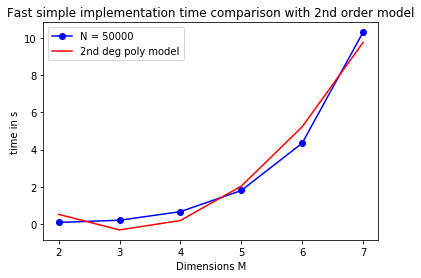

In [342]:
rand_state = 1234

avg_time = []
tot_vals = []

dim = 2

for tot_val in [10000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 800000, 1000000, 2000000]:
    avg_time.append(runtime_anal(tot_val, rand_state, is_pareto_efficient_simple, dim))
    tot_vals.append(tot_val)

plt.plot(tot_vals,avg_time,'o-b',label='M = 2')
#pfit = np.polyfit(tot_vals,avg_time, 2)
#tot_vals = np.array(tot_vals)
#plt.plot(tot_vals,pfit[0]*tot_vals**2 + pfit[1]*tot_vals + pfit[2],'-r') 
plt.title('Fast simple implementation time comparison')
plt.xlabel('data points N')
plt.ylabel('time in s')
plt.xticks(rotation=45)
plt.legend()
plt.show()

avg_time = []
tot_vals = []
vals = 50000

for tot_val in [2,3,4,5,6,7]:
    avg_time.append(runtime_anal(vals, rand_state, is_pareto_efficient_simple, tot_val))
    tot_vals.append(tot_val)

plt.plot(tot_vals,avg_time,'o-b',label='N = 50000')
pfit = np.polyfit(tot_vals,avg_time, 2)
tot_vals = np.array(tot_vals)
plt.plot(tot_vals,pfit[0]*tot_vals**2 + pfit[1]*tot_vals + pfit[2],'-r',label='2nd deg poly model') 
plt.title('Fast simple implementation time comparison with 2nd order model')
plt.xlabel('Dimensions M')
plt.ylabel('time in s')
plt.legend()
plt.show()

42.1 ms ± 1.39 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
148 ms ± 6.73 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
280 ms ± 14.9 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
620 ms ± 156 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
567 ms ± 45.2 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
838 ms ± 67.5 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
1.08 s ± 84.5 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


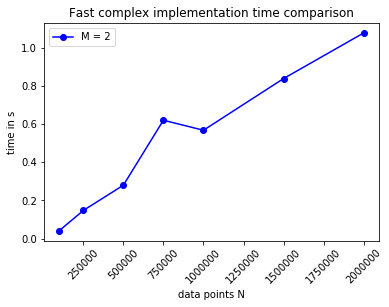

28.4 ms ± 2.33 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
97.3 ms ± 5.02 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
262 ms ± 13.3 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
855 ms ± 77.3 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
2.23 s ± 32.7 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
6.63 s ± 204 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


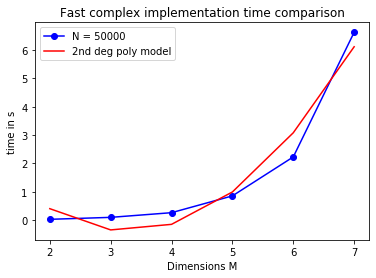

In [343]:
rand_state = 1234

avg_time = []
tot_vals = []

dim = 2

for tot_val in [100000, 250000,500000, 750000, 1000000, 1500000, 2000000]:
    avg_time.append(runtime_anal(tot_val, rand_state, is_pareto_efficient, dim))
    tot_vals.append(tot_val)

plt.plot(tot_vals,avg_time,'-ob',label='M = 2')
#pfit = np.polyfit(tot_vals,avg_time, 2)
#tot_vals = np.array(tot_vals)
#plt.plot(tot_vals,pfit[0]*tot_vals**2 + pfit[1]*tot_vals + pfit[2],'-r') 
plt.title('Fast complex implementation time comparison')
plt.xlabel('data points N')
plt.ylabel('time in s')
plt.xticks(rotation=45)
plt.legend()
plt.show()

avg_time = []
tot_vals = []
vals = 50000

for tot_val in [2,3,4,5,6,7]:
    avg_time.append(runtime_anal(vals, rand_state, is_pareto_efficient, tot_val))
    tot_vals.append(tot_val)

plt.plot(tot_vals,avg_time,'o-b',label='N = 50000')
pfit = np.polyfit(tot_vals,avg_time, 2)
tot_vals = np.array(tot_vals)
plt.plot(tot_vals,pfit[0]*tot_vals**2 + pfit[1]*tot_vals + pfit[2],'-r',label='2nd deg poly model') 
plt.title('Fast complex implementation time comparison')
plt.xlabel('Dimensions M')
plt.ylabel('time in s')
plt.legend()
plt.show()

## Modifications to increase time complexity

The majority of the time complexity in function `is_pareto_efficient` occurs during the first comparison step where the first objective function vector is compared with the rest in the matrix using `np.any()`

Currently, the efficient complex variation of the algorithm works in the following way (Note: Cost_matrix is an N by M matrix containing N data points and M objectives per data point) :


*Simplified pseudocode*

```
define is_pareto_efficient(Cost_matrix):
    initialize i = 0
    while i < len(Cost_matrix) do:
        Mask = Any(Cost_matrix < Cost_matrix[i]) ->
        Boolean vector with True if any row is True 
        Cost_matrix:= Cost_matrix[Mask]
        i:= i + 1 
    end
    return Cost_matrix           
```
The returned matrix `Cost_matrix` contains only non_dominated solutions 


### Improving time complexity by sorting the objective matrix

Since the majority of the time complexity occurs at the first comparison step, this process can be simplified by first sorting the objective matrix. This will not improve worst case scenario time complexities but can lead to improvements in average and best case scenarios.

*Simplified pseudocode*

```
define is_pareto_efficient_modified(Cost_matrix):
    initialize i = 0
    Cost_matrix:= Sort(Cost_matrix)
    while i < len(Cost_matrix) do:
        Mask = Any(Cost_matrix < Cost_matrix[i]) ->
        Boolean vector with True if any row is True 
        Cost_matrix:= Cost_matrix[Mask]
        i:= i + 1 
    end
    return Cost_matrix        
```

In [345]:
#Similar to the previous complex efficient algorithm but the objective matrix is sorted
# according to the first objective

def is_pareto_efficient_mod(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    return_mask = True
    
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    orig_pointers = costs[:,0].argsort(kind='quicksort') #sorting first objective
    costs = costs[orig_pointers] #sorted objectives matrix
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        is_efficient_mask_unscrambled = np.zeros(n_points, dtype = bool)
        #the Pareto truth masks need to be remapped into the original unsorted array
        for i,j in enumerate(orig_pointers):
            is_efficient_mask_unscrambled[j] = is_efficient_mask[i]
        return is_efficient_mask_unscrambled
    else:
        #is_efficient is not rescrambled due to lack of time 
        #hence return_mask is not an argument to the function
        return is_efficient


## Comparing performance of modified vs unmodified implementations

44.2 ms ± 4.92 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
79.7 ms ± 4.61 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
127 ms ± 10.6 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
216 ms ± 3.53 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
886 ms ± 31.2 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
25.2 ms ± 3.91 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
99.4 ms ± 3.61 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
280 ms ± 7 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
782 ms ± 18.7 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
1.94 s ± 37.1 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


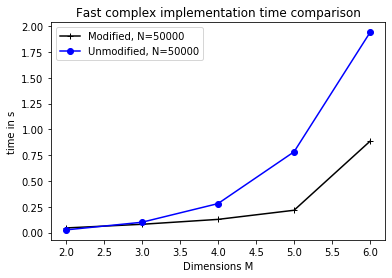

In [348]:
rand_state = 1234

avg_time_mod = []
tot_vals = []
vals = 50000

for tot_val in [2,3,4,5,6]:
    avg_time_mod.append(runtime_anal(vals, rand_state, is_pareto_efficient_mod, tot_val))
    tot_vals.append(tot_val)

plt.plot(tot_vals,avg_time_mod,'+-k', label = 'Modified, N=50000')
plt.title('Fast complex implementation modified time comparison')
plt.xlabel('Dimensions M')
plt.ylabel('time in s')


avg_time = []
tot_vals = []
vals = 50000

for tot_val in [2,3,4,5,6]:
    avg_time.append(runtime_anal(vals, rand_state, is_pareto_efficient, tot_val))
    tot_vals.append(tot_val)

plt.plot(tot_vals,avg_time,'o-b', label = 'Unmodified, N=50000')
plt.title('Fast complex implementation time comparison')
plt.xlabel('Dimensions M')
plt.ylabel('time in s')
plt.legend()
plt.show()


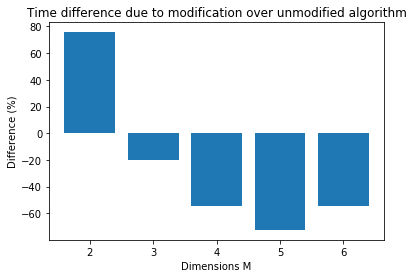

In [355]:
plt.bar(tot_vals,height=(np.array(avg_time_mod) - np.array(avg_time))/np.array(avg_time) * 100)
plt.title('Time difference due to modification over unmodified algorithm')
plt.xlabel('Dimensions M')
plt.ylabel('Difference (%)')
plt.show()

### Comparing optimal pareto solutions obtained from modified and unmodified algorithms 

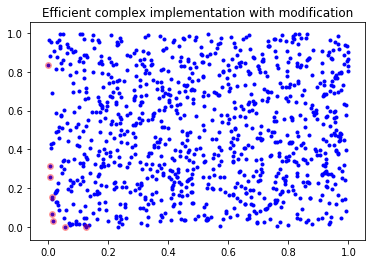

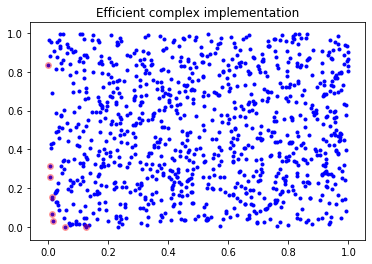

In [354]:
rng = np.random.RandomState(1134).rand(1000, 2)

a = is_pareto_efficient_mod(np.array(rng))
plt.scatter(x=rng[:,0],y=rng[:,1],c='b',marker='.')
plt.scatter(x=np.where(a,rng[:,0],np.nan),y=np.where(a,rng[:,1],np.nan),c='r',alpha=0.3,marker='o')
plt.title('Efficient complex implementation with modification')
plt.show()

a = is_pareto_efficient(np.array(rng))
plt.scatter(x=rng[:,0],y=rng[:,1],c='b',marker='.')
plt.scatter(x=np.where(a,rng[:,0],np.nan),y=np.where(a,rng[:,1],np.nan),c='r',alpha=0.3,marker='o')
plt.title('Efficient complex implementation')
plt.show()


### Additional Stack Overflow implemention

The referenced stack overflow page contained an additional implementation shown below. However, the algorithm did not produce pareto optimal solutions so it was not investigated further.

In [162]:
def dominates(row, candidateRow):
    return sum([row[x] >= candidateRow[x] for x in range(len(row))]) == len(row) 

def simple_cull(inputPoints, dominates):
    paretoPoints = set()
    candidateRowNr = 0
    dominatedPoints = set()
    while True:
        candidateRow = inputPoints[candidateRowNr]
        inputPoints.remove(candidateRow)
        rowNr = 0
        nonDominated = True
        while len(inputPoints) != 0 and rowNr < len(inputPoints):
            row = inputPoints[rowNr]
            if dominates(candidateRow, row):
                # If it is worse on all features remove the row from the array
                inputPoints.remove(row)
                dominatedPoints.add(tuple(row))
            elif dominates(row, candidateRow):
                nonDominated = False
                dominatedPoints.add(tuple(candidateRow))
                rowNr += 1
            else:
                rowNr += 1

        if nonDominated:
            # add the non-dominated point to the Pareto frontier
            paretoPoints.add(tuple(candidateRow))

        if len(inputPoints) == 0:
            break
    return paretoPoints, dominatedPoints

inputPoints = [[1,1], 
               [0.5,1.75], 
               [1,2], 
               [3,2], 
               [4,1]]

paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)

print ("*"*8 + " non-dominated answers " + ("*"*8))
for p in paretoPoints:
    print (p)
print ("*"*8 + " dominated answers " + ("*"*8))
for p in dominatedPoints:
    print (p)

******** non-dominated answers ********
(3, 2)
(4, 1)
******** dominated answers ********
(0.5, 1.75)
(1, 1)
(1, 2)


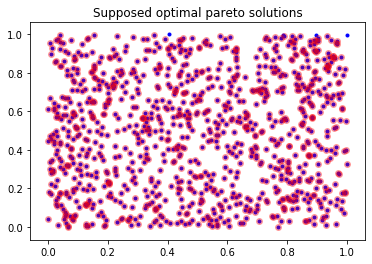

In [325]:
rng = np.random.RandomState(1234).rand(1000, 2)
plt.scatter(x=rng[:,0],y=rng[:,1],c='b',marker='.')

m = []
[m.append(list(a)) for a in rng]

_, dp = simple_cull(m, dominates)
v=[]
[v.append(np.array(p)) for p in dp]

v = np.array(v)
plt.scatter(x=v[:,0],y=v[:,1],c='r',alpha=0.3,marker='o')
plt.title('Supposed optimal pareto solutions')
plt.show()